In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
tqdm.pandas()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats.stats import pearsonr 

In [2]:
train_df=pd.read_csv('./Data/train.csv')

In [3]:
train_df.head()

,id,y,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,113.0,19,A,A,-0.140642,-0.388162,-0.574181,-0.583770,-0.376220,...,0.584130,-0.100278,-0.846640,-1.461938,-1.801008,-1.804553,-1.500023,-0.980571,-0.377526,0.168243
1,2,119.0,14,C,A,0.023754,-0.105455,-0.245025,-0.310670,-0.249384,...,-3.024336,-2.480266,-1.118005,0.181451,0.726820,0.401501,-0.356744,-0.913405,-0.854943,-0.193468
2,3,109.0,13,A,A,0.180818,0.135004,0.001879,-0.134548,-0.185928,...,-0.156851,-0.262902,-0.668436,-1.172372,-1.387328,-1.016077,-0.103130,0.935900,1.550512,1.405350
3,4,110.0,18,A,A,-0.234780,-0.094543,0.193084,0.508519,0.668783,...,-1.358540,-0.028478,0.535346,-0.116384,-1.542395,-2.486781,-1.631185,1.481241,6.015514,10.233163
4,5,123.0,32,A,A,-0.130934,-0.360313,-0.547045,-0.603495,-0.508025,...,-0.825535,-0.392556,0.156361,0.567142,0.756362,0.809336,0.844580,0.876423,0.801686,0.524566


In [5]:
target_values=train_df['y'].unique()

In [5]:
m=np.zeros((99,6670))
for v in tqdm(range(len(target_values))):
    corr=[]
    for i in range(0,116):
        roi_i=train_df[train_df['y']==target_values[v]].iloc[:,5+i*115:5+(i+1)*115]
        for j in range(i+1,116):
            roi_j=train_df[train_df['y']==target_values[v]].iloc[:,5+(j)*115:5+(j+1)*115]
            corr.append(pearsonr(roi_i.values.flatten(),roi_j.values.flatten())[0])
    m[v]=corr

100%|██████████| 99/99 [50:34<00:00, 30.65s/it]


In [6]:
# m=np.zeros((99,6670))
m = []
for v in tqdm(range(len(target_values))):
    corr=[]
    df_y = train_df[train_df['y']==target_values[v]].iloc[:, 5:]
    for i in range(0,116):
        roi_i=df_y.iloc[:,i*115:(i+1)*115]
        for j in range(i+1,116):
            roi_j=df_y.iloc[:,(j)*115:(j+1)*115]
            corr.append(pearsonr(roi_i.values.flatten(),roi_j.values.flatten())[0])
        #corr.append(roi_i.values.std() / 200)
        # print(roi_i.values.std() / 200)
    m.append(corr)
m = np.array(m)

100%|██████████| 99/99 [07:34<00:00,  4.59s/it]


In [71]:
usable_roi

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True])

In [68]:
m.shape

(99, 6786)

In [72]:
# m=np.zeros((99,6670))
m_ricci = []
for v in tqdm(range(len(target_values))):
    corr=[]
    df_y = train_df[train_df['y']==target_values[v]].iloc[:, 5:]
    for i in range(0,116):
        if usable_roi[i]:
            roi_i=df_y.iloc[:,i*115:(i+1)*115]
            for j in range(i+1,116):
                if usable_roi[j]:
                    roi_j=df_y.iloc[:,(j)*115:(j+1)*115]
                    corr.append(pearsonr(roi_i.values.flatten(),roi_j.values.flatten())[0])
        #corr.append(roi_i.values.std() / 200)
        # print(roi_i.values.std() / 200)
    m_ricci.append(corr)
m_ricci = np.array(m_ricci)


100%|██████████| 99/99 [02:24<00:00,  1.46s/it]


In [10]:
persona = np.array(train_df.iloc[1,5:]).reshape((116, 115)).astype(float)
corr = np.corrcoef(persona)
print(corr.shape)
corr


array([[ 1.        ,  0.38640554,  0.08416445, ..., -0.02241088,
         0.18301372, -0.11582895],
       [ 0.38640554,  1.        , -0.44050838, ...,  0.18745823,
         0.09692667, -0.31484989],
       [ 0.08416445, -0.44050838,  1.        , ...,  0.19245921,
         0.11024755,  0.28251509],
       ...,
       [-0.02241088,  0.18745823,  0.19245921, ...,  1.        ,
         0.04786964,  0.11274495],
       [ 0.18301372,  0.09692667,  0.11024755, ...,  0.04786964,
         1.        ,  0.14208132],
       [-0.11582895, -0.31484989,  0.28251509, ...,  0.11274495,
         0.14208132,  1.        ]])

In [52]:
epsi=1/116
Ric_subjects=[]
for index,row in tqdm(train_df.iterrows()):
    subject = np.array(row[5:]).reshape((116, 115)).astype(float)
    corr = np.corrcoef(subject)
    Ric=np.zeros((116,116))
    corr_pos=np.fmax(corr,epsi)
    for i in range(0,116):
        for j in range(i,116):
            val=2-corr_pos[i,j]*(np.sum(1/(np.sqrt(corr_pos[i,j]*corr_pos[i])))+np.sum(1/(np.sqrt(corr_pos[i,j]*corr_pos[j]))))
            Ric[i,j]=val
            Ric[j,i]=val
    Ric_subjects.append(np.mean(Ric,axis=1))


0it [00:00, ?it/s]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
600it [06:46,  1.48it/s]


In [50]:
average_ric=np.mean(Ric,axis=1)

In [51]:
average_ric

array([-436.85493348, -422.87170107, -438.2510712 , -421.24600375,
       -440.63593765, -492.06949644, -410.16931292, -432.93388115,
       -409.60812155, -457.84484347, -450.07251054, -417.66311797,
       -464.08441384, -450.85490449, -473.80167921, -412.43085419,
       -460.02412176, -451.85342729, -469.10361324, -392.7808454 ,
       -424.32372032, -471.12170118, -454.83295003, -440.19766182,
       -447.9110162 , -473.53257088, -449.05055402, -472.69636441,
       -468.23209803, -489.2771048 , -442.07975672, -423.33794112,
       -456.19371713, -430.11290363, -437.32906057, -438.5194336 ,
       -511.14600072, -441.77365788, -417.88457723, -439.82938655,
       -461.014174  , -474.36462676, -496.36902771, -484.23962631,
       -409.67956997, -437.31686845, -465.22941457, -437.61782891,
       -417.04161643, -441.27380502, -453.47680375, -433.10355041,
       -430.26548536, -453.77666863, -482.2452351 , -490.82970291,
       -401.35158647, -443.68629112, -444.79631838, -425.50186

In [53]:
average_ric>=np.median(average_ric)

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True])

In [55]:
Ric_subjects_arr=np.array(Ric_subjects)

In [59]:
avg=Ric_subjects_arr.mean(axis=0)

In [69]:
avg>=np.median(avg)
usable_roi=avg>=np.median(avg)

In [66]:
ROI=np.array([f'ROI{i}' for i in range(1,117)])

In [65]:
len(ROI)

116

In [67]:
ROI[avg>=np.median(avg)]

array(['ROI1', 'ROI3', 'ROI4', 'ROI5', 'ROI7', 'ROI8', 'ROI9', 'ROI10',
       'ROI11', 'ROI12', 'ROI13', 'ROI19', 'ROI20', 'ROI21', 'ROI33',
       'ROI34', 'ROI35', 'ROI36', 'ROI45', 'ROI46', 'ROI50', 'ROI51',
       'ROI52', 'ROI53', 'ROI54', 'ROI59', 'ROI60', 'ROI61', 'ROI62',
       'ROI65', 'ROI66', 'ROI67', 'ROI68', 'ROI69', 'ROI70', 'ROI71',
       'ROI72', 'ROI85', 'ROI86', 'ROI87', 'ROI88', 'ROI90', 'ROI95',
       'ROI96', 'ROI101', 'ROI102', 'ROI103', 'ROI104', 'ROI105',
       'ROI106', 'ROI107', 'ROI108', 'ROI109', 'ROI110', 'ROI113',
       'ROI114', 'ROI115', 'ROI116'], dtype='<U6')

In [7]:
columns=[f'ROI{i}-ROI{j}'  for i in range(1,116) for j in range (i+1,117) ]

In [74]:
m_ricc.shape

(99, 1653)

In [96]:
def get_corr(row,usable_roi,test=False):
    if test:
        brain = np.array(row[4:])
    else:
        brain = np.array(row[5:])
    #brain = brain.reshape((116, 115)).astype(float)
    #corr = np.corrcoef(brain)
    #flat = corr[np.triu_indices(corr.shape[0], 1)]
    corr = []
    for i in range(0,116):
        if usable_roi[i]:
            roi_i=brain[i*115:(i+1)*115]
            for j in range(i+1,116):
                if usable_roi[j]:
                    roi_j=brain[(j)*115:(j+1)*115]
                    # print(len(roi_i), len(roi_j))
                    corr.append(pearsonr(roi_i.flatten(), roi_j.flatten())[0])
            # corr.append(roi_i.std() / 200)
    return corr

    #return flat.tolist()


In [7]:
corr=train_df.progress_apply(lambda x :get_corr(x),axis=1)

  0%|          | 1/600 [00:01<11:29,  1.15s/it]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 600/600 [00:13<00:00, 43.42it/s]


In [75]:
#corr_df=pd.DataFrame(np.array(corr.values.tolist()),columns=columns).fillna(0)
corr_df=pd.DataFrame(m_ricc).fillna(0)
#new_train=corr_df
#new_train['var1']=train_df['var1']
#new_train['y']=train_df['y']

In [76]:
corr_df

,0,1,2,3,4,5,6,7,8,9,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652
0,-0.128682,-0.319849,-0.324166,-0.025520,-0.360514,-0.153844,-0.231056,0.406997,-0.019308,0.221273,...,0.405543,0.317367,0.156731,0.316928,0.598233,0.224943,0.198616,0.627310,0.493860,0.762508
1,0.215177,-0.324562,0.035001,0.299189,-0.011791,-0.092059,-0.311974,0.525294,0.316897,0.222939,...,0.228135,0.028930,-0.045873,0.114253,0.542688,0.266197,0.232802,0.610117,0.595988,0.759333
2,0.368124,0.129039,0.042282,0.320363,0.052695,-0.007191,-0.115823,0.438331,0.243395,0.197927,...,0.026509,0.266138,-0.046827,0.112721,0.094228,0.005790,0.001743,0.309380,0.356655,0.510192
3,0.128242,-0.336238,-0.117699,-0.300985,-0.291991,-0.028831,0.049166,0.264095,0.086405,0.101414,...,0.239482,0.211560,-0.142819,-0.050326,0.520089,0.097454,0.191578,0.496777,0.437103,0.702825
4,0.126783,-0.036986,-0.107399,0.093512,-0.132265,0.072785,-0.027129,0.206432,0.098717,-0.058600,...,0.076262,-0.057215,-0.071727,0.428875,0.296669,0.199877,0.037061,0.084179,-0.195883,0.133420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.351149,-0.038836,0.223067,0.319957,0.030517,0.159190,0.073564,0.437765,-0.078260,0.520290,...,0.043098,0.073808,0.063758,0.462111,0.502167,-0.034922,0.009250,0.179169,0.015129,0.072416
95,-0.062977,0.038081,-0.019106,-0.046278,-0.093730,0.160723,0.030468,0.343544,0.294119,0.343351,...,0.125703,0.162704,-0.049653,0.110388,0.328286,-0.343286,-0.097973,-0.050513,0.062323,0.119114
96,-0.217757,-0.406463,-0.127794,-0.223247,-0.346684,-0.108791,-0.248721,0.258565,-0.055787,0.025042,...,-0.188414,0.468370,0.172022,-0.092063,-0.278035,-0.062824,0.105871,0.127236,-0.137419,0.384195
97,0.041617,0.422122,0.218517,0.198131,0.160266,-0.095230,-0.382416,0.069999,0.038906,-0.101761,...,0.141199,0.257843,0.268758,0.285794,0.243030,0.092524,0.197212,0.302225,0.111809,-0.008902


In [77]:
corr_df['y']=target_values

In [13]:
first_cols = train_df.iloc[:, [1,2,3,4]]

In [14]:
new_train = first_cols.join(corr_df)

In [15]:
new_train['var2'].replace({'A':0, 'C':1}, inplace = True)
new_train['var3'].replace({'A':0, 'C':1}, inplace = True)

In [16]:
new_train

,y,var1,var2,var3,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,113.0,19,0,0,0.353489,-0.128682,-0.319849,-0.324166,-0.246387,-0.025520,...,0.683160,0.349207,0.184093,0.295171,0.598233,0.224943,0.198616,0.627310,0.493860,0.762508
1,119.0,14,1,0,0.266270,0.215177,-0.324562,0.035001,-0.268579,0.299189,...,0.701862,0.410321,0.140138,0.134177,0.542688,0.266197,0.232802,0.610117,0.595988,0.759333
2,109.0,13,0,0,0.176860,0.368124,0.129039,0.042282,-0.109159,0.320363,...,0.701880,0.105945,0.015031,0.058321,0.094228,0.005790,0.001743,0.309380,0.356655,0.510192
3,110.0,18,0,0,0.385438,0.128242,-0.336238,-0.117699,-0.216569,-0.300985,...,0.471972,0.129105,-0.086784,0.024874,0.520089,0.097454,0.191578,0.496777,0.437103,0.702825
4,123.0,32,0,0,0.288994,0.126783,-0.036986,-0.107399,-0.018702,0.093512,...,0.502216,0.412209,0.171462,-0.051080,0.296669,0.199877,0.037061,0.084179,-0.195883,0.133420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,110.0,41,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,120.0,64,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,96.0,27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,118.0,29,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
new_train.groupby('y').size().sort_values(ascending=False)

y
100.0    24
113.0    20
109.0    19
119.0    18
108.0    17
         ..
112.5     1
114.5     1
115.5     1
121.5     1
148.0     1
Length: 99, dtype: int64

In [83]:
new_train=new_train.groupby('y').mean().reset_index()

In [80]:
new_train=corr_df

# Train

## Linear Regession

In [248]:
reg = LinearRegression()

In [249]:
X_train, X_test, y_train, y_test = train_test_split(new_train.drop(columns='y'), new_train['y'], test_size=0.25, random_state=42)

In [250]:
reg.fit(X_train,y_train)

LinearRegression()

In [251]:
y_pred=reg.predict(X_test)

In [252]:
mean_squared_error(y_test, y_pred,squared=False)

20.442849696034543

## SVR

In [485]:
#params = [{'kernel' : ['poly',],
#        'C' : [1,5,10,12,15,20,25],
#        'degree' : [2,3,4],
#        'coef0' : [0.01,0.02,0.5],
#        'gamma' : ('auto','scale'),
#        'epsilon':[0.02,0.05,0.1]}]
params = [{'kernel' : ['rbf',],
        'C' : [1,5,10,12,15,20,25],
        #'degree' : [2,3,4],
        'coef0' : [0.01,0.02,0.5],
        'gamma' : ('auto','scale'),
        'epsilon':[0.02,0.05,0.1]}]

In [486]:
svr_reg=SVR()
grids = GridSearchCV(svr_reg,params,cv=5,verbose=5,n_jobs=-1)
grids.fit(X_train,y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [25, 26, 28, 30, 32], 'coef0': [0.01, 0.02, 0.5],
                          'epsilon': [0.02, 0.05, 0.1],
                          'gamma': ('auto', 'scale'), 'kernel': ['rbf']}],
             verbose=5)

In [487]:
grids.best_params_

{'C': 32, 'coef0': 0.01, 'epsilon': 0.02, 'gamma': 'scale', 'kernel': 'rbf'}

In [488]:
y_pred=grids.predict(X_test)

In [489]:
mean_squared_error(y_test, y_pred,squared=False)

19.14640318806492

In [428]:
#retrain on all dataset
#svr_reg=SVR(C= 10, degree= 2, kernel= 'poly')
#svr_reg=SVR(C= 10, degree= 3, kernel= 'poly',gamma='scale',coef0=0.5)
svr_reg=SVR(C= 15, degree= 3, kernel= 'poly',gamma='scale',coef0=0.5,epsilon=0.02)
svr_reg.fit(new_train.drop(columns='y'),new_train['y'])

SVR(C=15, coef0=0.5, epsilon=0.02, kernel='poly')

In [429]:
y_pred=svr_reg.predict(X_test)

In [430]:
mean_squared_error(y_test, y_pred,squared=False)

0.687046353767287

## K-neigbors regression

In [214]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
for k in range(30,45):
    neigh = KNeighborsRegressor(n_neighbors=k,weights='uniform').fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    print(k,mean_squared_error(y_test, y_pred,squared=False))

30 19.58036998855969
31 19.527744344074502
32 19.543694035736948
33 19.622829230191176
34 19.703185065620833
35 19.915654595297234
36 19.990579378519495
37 19.638151774370755
38 19.61703549768546
39 19.662257721284828
40 19.570198644878392
41 19.55265043933572
42 19.59627029625305
43 19.67577610908556
44 19.64080481657957


In [221]:
for k in range(1,20):
    neigh = KNeighborsRegressor(n_neighbors=k,weights='distance',p=2).fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    print(k,mean_squared_error(y_test, y_pred,squared=False))

1 20.921759008266967
2 20.185124549326677
3 19.239232483108623
4 20.175760721879367
5 20.19807769543227
6 20.2952043471166
7 19.63323638681482
8 19.946352350108516
9 19.683248053341213
10 19.848312219180944
11 19.469910606653734
12 19.135311761083184
13 18.870401520129956
14 18.966359699849924
15 19.61437728969104
16 20.044108867288173
17 20.148731098747092
18 20.48265127667949
19 20.412416986942212


In [222]:
neigh = KNeighborsRegressor(n_neighbors=12,weights='distance',p=2).fit(X_train, y_train)

In [223]:
y_pred=neigh.predict(X_test)

In [224]:
mean_squared_error(y_test, y_pred,squared=False)

19.135311761083184

In [225]:
neigh = KNeighborsRegressor(n_neighbors=12,weights='distance',p=2).fit(new_train.drop(columns='y'),new_train['y'])

In [226]:
y_pred=neigh.predict(X_test)

In [227]:
mean_squared_error(y_test, y_pred,squared=False)

4.643923040349269e-06

In [119]:
# Gradient Boosting

# Gradient Boosting

In [131]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

reg = GradientBoostingRegressor(random_state=0,n_estimators=200)
reg.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=200, random_state=0)

In [132]:
y_pred=reg.predict(X_test)

In [133]:
mean_squared_error(y_test, y_pred,squared=False)

20.34134513792314

In [134]:
reg.fit(new_train.drop(columns='y'),new_train['y'])

GradientBoostingRegressor(n_estimators=200, random_state=0)

# Elastic net

In [167]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet( random_state=0,alpha=0.5)
regr.fit(X_train, y_train)


ElasticNet(alpha=0.5, random_state=0)

In [168]:
y_pred=regr.predict(X_test)
mean_squared_error(y_test, y_pred,squared=False)

19.48317590132921

In [160]:
regr.fit(new_train.drop(columns='y'),new_train['y'])

ElasticNet(random_state=0)

# Ada boost

In [137]:
from sklearn.ensemble import AdaBoostRegressor
#from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,
#                       random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [138]:
y_pred=regr.predict(X_test)

In [139]:
mean_squared_error(y_test, y_pred,squared=False)

19.09970634577643

In [140]:
regr.fit(new_train.drop(columns='y'),new_train['y'])

AdaBoostRegressor(n_estimators=100, random_state=0)

# Random forest

In [205]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 120, random_state = 0,max_features='auto',criterion='mae')
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(criterion='mae', n_estimators=120, random_state=0)

In [206]:
y_pred=regressor.predict(X_test)
mean_squared_error(y_test, y_pred,squared=False)

19.323857627583347

In [207]:
regressor.fit(new_train.drop(columns='y'),new_train['y'])

RandomForestRegressor(criterion='mae', n_estimators=120, random_state=0)

In [407]:
from sklearn import linear_model
from sklearn.linear_model import Ridge,Lasso,MultiTaskLasso,Lars,BayesianRidge,RANSACRegressor,TheilSenRegressor
clf = TheilSenRegressor()

In [408]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
mean_squared_error(y_test, y_pred,squared=False)

21.15634742207624

In [409]:
clf.fit(new_train.drop(columns='y'),new_train['y'])

TheilSenRegressor(max_subpopulation=10000)

In [438]:
from sklearn.cross_decomposition import PLSRegression

In [458]:
pls2 = PLSRegression(n_components=10)
pls2.fit(X_train, y_train)

PLSRegression(n_components=10)

In [459]:
y_pred=pls2.predict(X_test)
mean_squared_error(y_test, y_pred,squared=False)

20.367863413137403

In [460]:
pls2.fit(new_train.drop(columns='y'),new_train['y'])

PLSRegression(n_components=10)

# Test 

In [94]:
test_df=pd.read_csv('./Data/test.csv')

In [95]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [97]:
corr_test=test_df.progress_apply(lambda row:get_corr(row,usable_roi,test=True),axis=1)

  2%|▏         | 3/199 [00:02<02:19,  1.40it/s]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
100%|██████████| 199/199 [02:08<00:00,  1.55it/s]


In [98]:
test_final_df=pd.DataFrame(np.array(corr_test.values.tolist())).fillna(0)

In [99]:
test_final_df

,0,1,2,3,4,5,6,7,8,9,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652
0,-0.184674,0.335784,-0.433897,0.121238,-0.304749,-0.360175,-0.213842,0.592588,0.337346,0.261790,...,0.059721,-0.139047,0.292124,-0.189912,-0.060189,0.135940,-0.068397,0.239504,0.221618,-0.186755
1,0.091974,-0.012738,0.018270,0.286588,-0.024430,0.003806,-0.102631,-0.192910,-0.088184,0.150901,...,0.053499,0.202817,-0.271832,-0.033193,-0.069734,0.214056,0.230202,0.037493,0.031108,0.125471
2,0.118248,-0.275287,0.067088,-0.158764,-0.122662,0.233291,0.070906,0.441458,-0.068922,0.326351,...,0.234287,0.064304,0.235092,0.574309,0.504827,0.382075,0.136943,0.402817,0.237602,0.293227
3,-0.424435,-0.260486,-0.053301,-0.187334,-0.161422,-0.307382,-0.090365,0.439814,0.182087,0.310335,...,-0.077084,-0.436091,0.213071,0.315935,0.186580,-0.116094,0.077223,0.041814,-0.004182,0.266954
4,0.145877,-0.131794,0.361544,0.055204,-0.210112,0.204085,0.027663,0.721721,0.615052,0.407586,...,0.137650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.204179,-0.118850,0.250223,-0.195145,-0.325952,-0.053743,-0.012564,0.794479,0.338629,0.253609,...,0.138667,-0.481127,-0.418897,-0.324728,-0.006917,-0.157338,-0.094451,0.751545,0.652086,0.765714
195,0.038288,-0.065834,-0.123540,0.372467,-0.039882,-0.101934,-0.115844,0.628183,0.089262,0.147353,...,-0.175271,0.282997,0.300204,0.190003,0.502507,0.234785,0.260871,0.272752,0.113825,0.565614
196,-0.058686,-0.264435,-0.292921,-0.363793,-0.426708,0.040388,-0.286963,0.561433,0.347283,0.271698,...,0.125242,0.692103,0.605296,0.189826,0.451872,0.040126,0.278858,0.593402,0.321660,0.652692
197,-0.386250,-0.283560,0.059427,-0.092002,0.283123,0.147292,-0.060154,0.400976,0.673323,0.499302,...,-0.183756,-0.024456,-0.087496,0.103422,0.317849,0.188834,-0.064073,0.547437,0.426339,0.495522


In [28]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [29]:
first_cols_test = test_df.iloc[:, [1,2,3]]
new_test = first_cols_test.join(test_final_df)
new_test['var2'].replace({'A':0, 'C':1}, inplace = True)
new_test['var3'].replace({'A':0, 'C':1}, inplace = True)

In [30]:
new_test

,var1,var2,var3,Roi1-Roi2,Roi1-Roi3,Roi1-Roi4,Roi1-Roi5,Roi1-Roi6,Roi1-Roi7,Roi1-Roi8,...,Roi112-Roi113,Roi112-Roi114,Roi112-Roi115,Roi112-Roi116,Roi113-Roi114,Roi113-Roi115,Roi113-Roi116,Roi114-Roi115,Roi114-Roi116,Roi115-Roi116
0,32,0,0,0.574820,-0.184674,0.335784,-0.433897,-0.314960,0.121238,-0.304749,...,0.188771,0.237508,0.273457,0.225723,-0.060189,0.135940,-0.068397,0.239504,0.221618,-0.186755
1,11,1,0,0.459187,0.091974,-0.012738,0.018270,-0.144327,0.286588,-0.024430,...,0.395746,-0.245494,0.173441,0.203784,-0.069734,0.214056,0.230202,0.037493,0.031108,0.125471
2,17,0,1,0.318010,0.118248,-0.275287,0.067088,0.031507,-0.158764,-0.122662,...,0.656703,0.428289,0.123900,0.090384,0.504827,0.382075,0.136943,0.402817,0.237602,0.293227
3,17,0,1,0.405577,-0.424435,-0.260486,-0.053301,0.118364,-0.187334,-0.161422,...,0.560449,0.255396,-0.304971,-0.070677,0.186580,-0.116094,0.077223,0.041814,-0.004182,0.266954
4,16,0,1,0.531680,0.145877,-0.131794,0.361544,0.015393,0.055204,-0.210112,...,0.003357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,20,0,1,0.217994,0.204179,-0.118850,0.250223,0.456717,-0.195145,-0.325952,...,0.218118,0.021160,0.018531,0.039184,-0.006917,-0.157338,-0.094451,0.751545,0.652086,0.765714
195,24,0,1,0.465376,0.038288,-0.065834,-0.123540,-0.223827,0.372467,-0.039882,...,0.453787,0.121769,0.407962,0.322393,0.502507,0.234785,0.260871,0.272752,0.113825,0.565614
196,24,0,1,0.320433,-0.058686,-0.264435,-0.292921,-0.012648,-0.363793,-0.426708,...,0.072454,-0.090642,0.058275,0.047026,0.451872,0.040126,0.278858,0.593402,0.321660,0.652692
197,29,1,1,0.550265,-0.386250,-0.283560,0.059427,0.095853,-0.092002,0.283123,...,0.114647,0.535039,0.289765,0.529971,0.317849,0.188834,-0.064073,0.547437,0.426339,0.495522


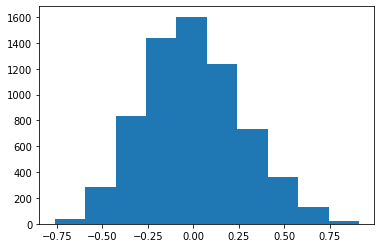

In [73]:
plt.hist(new_test.iloc[0,3:]);

In [470]:
y_pred_test=svr_reg.predict(test_final_df)

(array([ 1.,  2.,  3., 13., 30., 55., 50., 28.,  8.,  9.]),
 array([ 84.32176697,  88.23334536,  92.14492375,  96.05650214,
         99.96808053, 103.87965892, 107.79123731, 111.7028157 ,
        115.61439409, 119.52597248, 123.43755087]),
 <BarContainer object of 10 artists>)

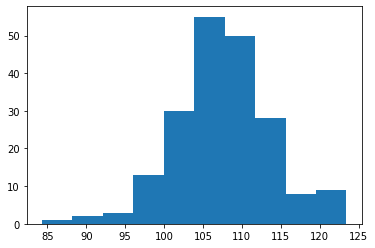

In [471]:
plt.hist(y_pred_test)

In [472]:
y_pred_test.max()

123.43755086660097

In [473]:
y_pred_test

array([105.0933772 , 107.32378816, 115.49033842, 106.95351601,
       108.68601748, 108.66183987,  93.91939329, 111.62311321,
       112.79841041, 108.28122656, 104.58357781, 106.50563636,
       108.78377609, 115.3393615 , 105.97739503, 110.81183132,
       112.9811967 , 108.15070234, 107.52130063, 111.89803486,
       112.06182492, 115.20955042, 121.82369062, 113.56303614,
        96.91116447, 112.66924749, 113.33237292, 118.68601406,
       108.03940067, 108.05462311, 107.27461557, 113.94775108,
       104.02702798, 119.81327851, 119.5847305 , 123.43755087,
       103.62726141,  98.25139742, 109.1607853 , 101.40010123,
       112.45120901,  99.17614486, 114.60405262, 107.75087159,
       102.7108368 , 107.1777445 , 117.4771024 , 108.13420664,
       108.2008809 , 105.58219666,  84.32176697, 105.54043401,
       105.19953487, 110.18738189,  91.51478929, 110.47556482,
       111.69723799, 107.64180191, 106.32480255, 107.3195824 ,
       107.14951527, 105.50285284, 111.07959196, 112.43

In [469]:
df_leaderboard=pd.DataFrame({'id':test_df['id'],'target':y_pred_test})

ValueError: Data must be 1-dimensional

In [436]:
df_leaderboard

,id,target
0,17,105.093377
1,19,107.323788
2,25,115.490338
3,32,106.953516
4,33,108.686017
...,...,...
194,777,115.176389
195,783,100.538578
196,784,106.552008
197,792,110.864777


In [44]:
df_leaderboard

,id,target
0,17,110.158718
1,19,107.920292
2,25,108.159483
3,32,104.923576
4,33,106.752830
...,...,...
194,777,113.772811
195,783,112.309465
196,784,113.409241
197,792,114.279185


In [437]:
df_leaderboard.to_csv('G14_24_super_crazy_preprocessing_model_quarta_prova',index=False)